codebasics - ml tutorials python 

----------------v2-------------------


linear regression 

In [1]:
# use shift + tab to show help

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Book0.xlsx')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


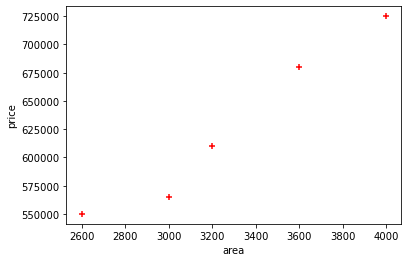

In [4]:
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

array([628715.75342466])

In [7]:
reg.coef_

array([135.78767123])

In [8]:
reg.intercept_

180616.43835616432

In [9]:
reg.predict([[5000]])

array([859554.79452055])

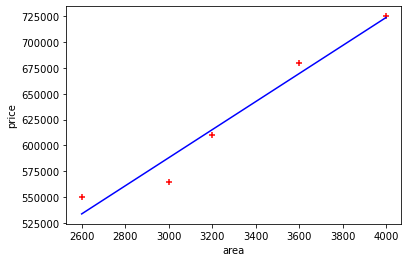

In [10]:
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color ='blue')

-----------v3-----------      multiple linear regression

In [11]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_excel("Book1.xlsx")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
# df.bedrooms[2] =math.floor(df.bedrooms.median())

mbd = math.floor(df.bedrooms.median())
df.bedrooms =df.bedrooms.fillna(mbd)

In [14]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms','age']],df.price)

LinearRegression()

In [16]:
reg.predict([[3000,3,40]])
reg.predict([[3000,3,40]])

array([444400.])

In [17]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [18]:
reg.intercept_

383725.0

In [19]:
reg.predict([[2500,4,5]])

array([588625.])

In [20]:
from word2number import w2n
print(w2n.word_to_num("twenty two"))

22


--------------------v2 --- exercise -------------------------

In [21]:
df2 = pd.read_excel("Book2.xlsx")

In [22]:
df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
median_exp  = df2.test_score.median()
df2.test_score = df2.test_score.fillna(median_exp)

df2

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [24]:
print(median_exp)
print(math.floor(8.0))

8.0
8


In [25]:
# for values in df2.experience:
#     if values!= "":
#         df2.experince[values] = w2n.word_to_num(values)
        
#[w2n.word_to_num(values) for x in df2.experience]

In [26]:
df2.experience.dtypes

dtype('O')

In [27]:
df2.experience = df2.experience.fillna("zero")
df2.experience = df2.experience.apply(w2n.word_to_num)


In [28]:
df2

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [29]:
reg.fit(df2[["experience", "test_score", "interview_score"]], df2.salary)

LinearRegression()

In [30]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [31]:
reg.predict([[12,10,10]])

array([92002.18340611])

In [32]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [33]:
reg.intercept_ # base salary

17737.263464337688

In [34]:
# predict salary for 
# 1- 2,9,6
# 2- 12,10,10

-------------------v5----------------

# pickle 


In [35]:
import pickle 

# pickle allows us to serialise our python object into a file

In [36]:
model = linear_model.LinearRegression()
model.fit(df2[["experience", "test_score", "interview_score"]], df2.salary)



LinearRegression()

In [37]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model,f)

# wb - write binary data
# rb -  read binary data

In [38]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [39]:
# now mp is our model in form of file in memory

# it can be trained with any way and can be saved and shared 

In [40]:
mp.predict([[3,8,8]])

array([58583.69723435])

In [41]:
# joblib do the same but is efficient for large numpy arrays
import joblib


In [42]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [43]:
mj = joblib.load('model_joblib')

In [44]:
mj.predict([[3,8,8]])

array([58583.69723435])

In [45]:
mj.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [46]:
df2 = pd.DataFrame({'town':["silwani","silwani","silwani","silwani","silwani","vidisha","vidisha","vidisha","vidisha","bhopal","bhopal","bhopal","bhopal"],'area':[2600,3000,3200,3600,4000,2600, 2800,3300,3600,2600,2900,3100,3600],'price':[550000,565000,610000,680000,725000,585000,615000,650000,710000,575000,600000,620000,695000]})

In [47]:
df2

,town,area,price
0,silwani,2600,550000
1,silwani,3000,565000
2,silwani,3200,610000
3,silwani,3600,680000
4,silwani,4000,725000
5,vidisha,2600,585000
6,vidisha,2800,615000
7,vidisha,3300,650000
8,vidisha,3600,710000
9,bhopal,2600,575000


-------------v6------------

dummy variables and one hot encoding

In [48]:
dummies = pd.get_dummies(df2.town)
dummies

,bhopal,silwani,vidisha
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [49]:
merged = pd.concat([df2,dummies],axis ='columns')
merged

,town,area,price,bhopal,silwani,vidisha
0,silwani,2600,550000,0,1,0
1,silwani,3000,565000,0,1,0
2,silwani,3200,610000,0,1,0
3,silwani,3600,680000,0,1,0
4,silwani,4000,725000,0,1,0
5,vidisha,2600,585000,0,0,1
6,vidisha,2800,615000,0,0,1
7,vidisha,3300,650000,0,0,1
8,vidisha,3600,710000,0,0,1
9,bhopal,2600,575000,1,0,0


In [50]:
final = merged.drop(['town','silwani'],axis =1)
final

,area,price,bhopal,vidisha
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [51]:
x = final.drop(['price'],axis=1)
x

,area,bhopal,vidisha
0,2600,0,0
1,3000,0,0
2,3200,0,0
3,3600,0,0
4,4000,0,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,1,0


In [52]:
y = final.price

In [53]:
model.fit(x,y)

LinearRegression()

In [54]:
model.predict([[2800,1,0]])

array([590775.63964739])

In [55]:
model.score(x,y)

0.9573929037221872

In [56]:
df3 = pd.read_excel('cars.xlsx')
df3

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df30 = df3
df30['Car Model'] = le.fit_transform(df30['Car Model'])
df30

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [59]:
x = df30[['Car Model','Mileage','Age(yrs)']].values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [60]:
y = df30['Sell Price($)'].values

In [61]:
model.fit(x,y)

LinearRegression()

In [62]:
model.predict([[1,69000,6]])

array([22855.47176747])

In [63]:
model.score(x,y)

0.8719970367825952

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [65]:
x = ct.fit_transform(x)
x


array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [66]:
x =x [:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [67]:
model.fit(x,y)

LinearRegression()

In [68]:
model.predict([[0,1,45000,4]])

array([36991.31721063])

In [69]:
model.predict([[1,0,86000,7]])

array([11080.74313217])

In [70]:
model.predict([[1,0,69000,6]])

array([18705.27236439])

------------------v8----------------------

In [71]:
df4 =pd.read_excel('insurence.xlsx')
df4

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


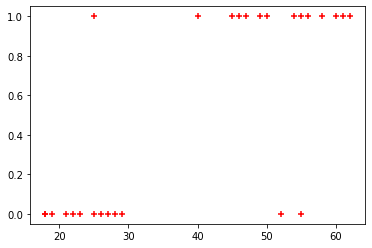

In [72]:
plt.scatter(df4.age,df4.bought_insurance,marker='+',color='red')


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df4[['age']], df4.bought_insurance, train_size = 0.9)

In [75]:
x_test

,age
2,47
21,26
18,19


In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_predicted = model.predict(x_test)

In [78]:
model.score(x_test,y_test)

1.0

In [79]:
model.predict_proba(x_test)

array([[0.26486296, 0.73513704],
       [0.83317956, 0.16682044],
       [0.92306388, 0.07693612]])

In [80]:
# 1st part    |  will not buy

In [81]:
model.predict([[25]])

array([0], dtype=int64)

----------------- v8.2------------------

In [82]:
from sklearn.datasets import load_digits

digits = load_digits()

<Figure size 432x288 with 0 Axes>

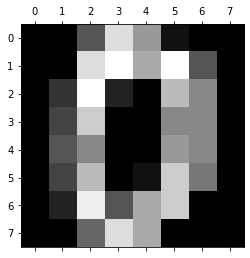

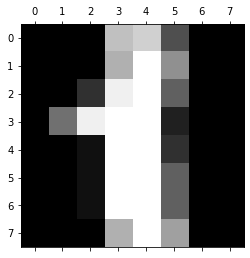

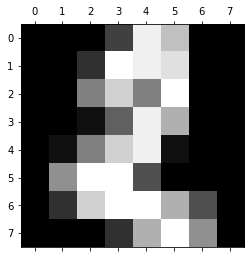

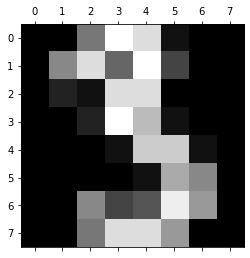

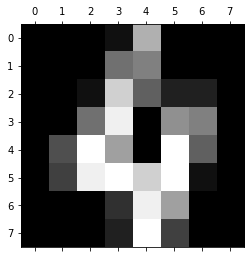

In [83]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [84]:
# dir() is a  function  which returns list of the attributes and methods of any object
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [85]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.15)


In [87]:
model.fit(X_train, y_train)
model.score(X_test, y_test)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9518518518518518

In [88]:
model.predict(digits.data[0:5])


array([0, 1, 2, 3, 4])

In [89]:
y_predicted = model.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  1,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

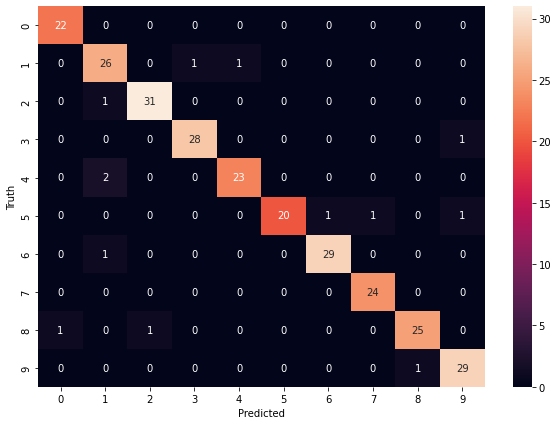

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
count =0
for l in model.predict(digits.data) :
    if l == 3:
         count = count +1
print(count)
    
# ie total in training and test

183


In [93]:
count =0
for l in model.predict(X_test) :
    if l == 3:
         count = count +1
print(count)
# in predicted test data 

29


------------v12-------------

random forest (after decision tree )

In [94]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [95]:
df['target'] = digits.target

In [96]:
X = df.drop('target',axis='columns')
y = df.target

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [99]:
y_predicted = model.predict(X_test)
model.score(X_test, y_test)

0.9444444444444444

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0, 31,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  1,  1, 45,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  2, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

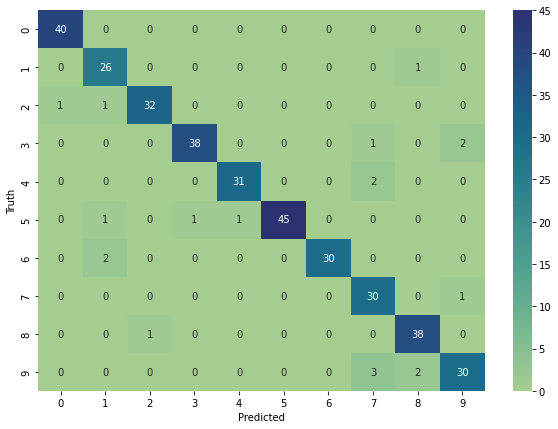

In [101]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Truth')


----------------------v10-----------------------
decision tree

In [102]:
df = pd.read_excel('salaries.xlsx')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [103]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



inputs['company_n'] = le.fit_transform(inputs['company'])
inputs['job_n'] = le.fit_transform(inputs['job'])
inputs['degree_n'] = le.fit_transform(inputs['degree'])

In [105]:

inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [106]:
inputs_n = inputs.drop(['company','job', 'degree'],axis ='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [107]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [108]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)

DecisionTreeClassifier()

In [109]:
model.score(inputs_n,target)


1.0

In [110]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

model.predict([[2,1,0]])

array([0], dtype=int64)

In [111]:
# Is salary of Google, Computer Engineer, Masters degree > 100 k ?

model.predict([[2,1,1]])

array([1], dtype=int64)

---------------- v11 l10 -----------------

In [112]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [113]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [116]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [118]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [119]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.loc[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


In [120]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

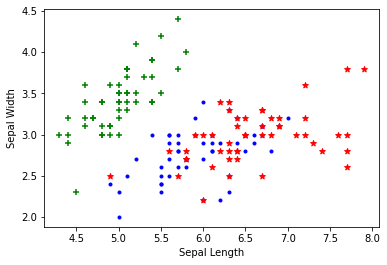

In [121]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*')

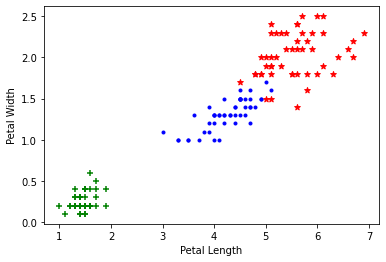

In [122]:

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='*')

In [123]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =28)

In [125]:
print(len(X_train))
print(len(X_test))

120
30


In [126]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [127]:
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

In [128]:
model.score(X_test, y_test)


0.9666666666666667

In [129]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [130]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [131]:
model_C = SVC(C=75)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [132]:
model_C = SVC(gamma = 10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.8666666666666667

In [133]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

----------------v13-----------------------

## k_ cross validation

In [134]:
# selecting the model that is the best

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

logistic regression

In [136]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9666666666666667

SVM

In [137]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6

In [138]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

In [139]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [140]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [141]:
#lets try for different functions

In [142]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [143]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [144]:
print(scores_logistic)

print(scores_svm)

print(scores_rf)

[0.9222222222222223, 0.8833333333333333, 0.9526462395543176, 0.958217270194986, 0.8941504178272981]
[0.4111111111111111, 0.45, 0.45403899721448465, 0.44846796657381616, 0.479108635097493]
[0.9166666666666666, 0.9166666666666666, 0.9415041782729805, 0.9554317548746518, 0.9164345403899722]


In [145]:
# dont worry this all can be done using one function only

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=4)


array([0.93777778, 0.91091314, 0.95768374, 0.90423163])

In [148]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=4)


array([0.40888889, 0.40534521, 0.43207127, 0.50556793])

In [149]:
cc = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=4)
cc

array([0.92444444, 0.91314031, 0.96436526, 0.92427617])

In [150]:
cc.mean()

0.9315565454095521

In [151]:
# now time for different parameters in same function (known as parameter tuning)

In [152]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.875391061452514

In [153]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores2)

0.9410117939168219

In [154]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50),digits.data, digits.target, cv=10)
np.average(scores)

0.9365394165114835

In [155]:
scores = cross_val_score(RandomForestClassifier(n_estimators=70),digits.data, digits.target, cv=10)
np.average(scores)

0.9515673494723773

## Unsupervised learning 

----------------t13-----------------

In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [157]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

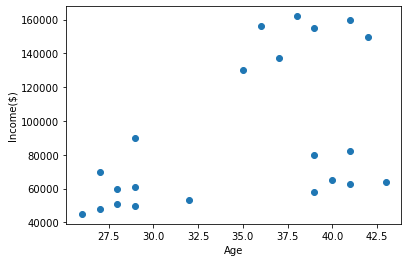

In [158]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')


In [159]:
km = KMeans(n_clusters=3)   # make centroid 3 times
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [160]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [161]:
km.cluster_centers_


array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

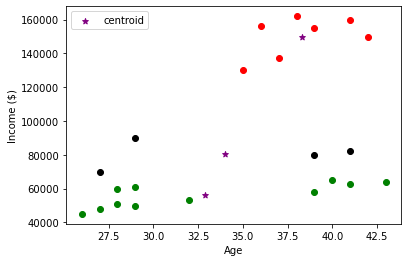

In [162]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [163]:
# facing problem because of high range difference

In [164]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


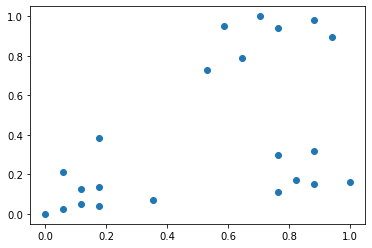

In [165]:
plt.scatter(df.Age,df['Income($)'])


In [166]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [167]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [168]:
km.cluster_centers_


array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

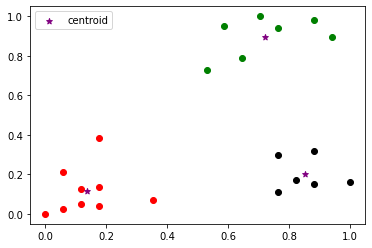

In [169]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


In [173]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
    
# Suppress Warnings for clean notebook
# import warnings
# warnings.filterwarnings('ignore')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


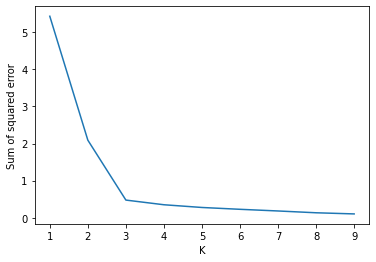

In [171]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


In [172]:
# at k = 3 there is elbow

--------------------L17---------------------
regularisation L1 and L2